In [24]:

def fisher_matrix(t, w, a, shots):
    def p(t, w, a):

        return 1 / 2 * (1 + np.cos(w * t) * np.exp(-a * t))

    def pw(t, w, a):
        return - 1 / 2 * t * np.sin(w * t) * np.exp(-a * t)

    def pww(t, w, a):
        return - 1 / 2 * t ** 2 * np.cos(w * t) * np.exp(-a * t)

    def pa(t, w, a):
        return - 1 / 2 * t * np.cos(w * t) * np.exp(-a * t)

    def paa(t, w, a):
        return 1 / 2 * t ** 2 * np.cos(w * t) * np.exp(-a * t)

    def paw(t, w, a):
        return 1 / 2 * t ** 2 * np.sin(w * t) * np.exp(-a * t)
    Iww = 0
    Iaa = 0
    Iwa = 0

    for i in range(len(t)):
        p0 = p(t[i], w, a)
        p1 = 1 - p0
        pw0 = pw(t[i], w, a)
        pw1 = -pw0
        pww0 = pww(t[i], w, a)
        pww1 = -pww0
        pa0 = pa(t[i], w, a)
        pa1 = -pa0
        paa0 = paa(t[i], w, a)
        paa1 = -paa0
        paw0 = paw(t[i], w, a)
        paw1 = -paw0

        if p0 == 0:
            p0 = 1e-10
        if p1 == 0:
            p1 = 1e-10

        Iww += shots[i] * (p0 * ((pw0 ** 2) / p0 ** 2) + p1 * ((pw1 ** 2) / p1 ** 2))
        Iaa += shots[i] * (p0 * ((pa0 ** 2) / p0 ** 2) + p1 * ((pa1 ** 2) / p1 ** 2))
        Iwa += shots[i] * (p0 * ((pw0 * pa0) / p0 ** 2) + p1 * ((pw1 * pa1) / p1 ** 2))
    return np.array([[Iww, Iwa], [Iwa, Iaa]])


def rao_bound_complex(T, a, sigma):
    I = 0
    for t in T:
        I += 1 / (sigma ** 2) * t ** 2 * np.exp(-2 * t * a)
    bound = 1 / np.sqrt(I)
    return bound


def rao_bound(T, w, a, shots):
    f_mat = fisher_matrix(T, w, a, shots)
    try :
        inv = np.linalg.inv(f_mat)
    except:
        return 100
    # inv = np.linalg.inv(f_mat)
    inv = inv.reshape(2,2)
    w_var = np.sqrt(inv[0, 0])
    a_var = np.sqrt(inv[1, 1])
    #
    # return w_var
    return a_var, w_var
    # return np.mean([w_var/w, a_var/a])
    # w_var = inv[0, 0]
    # a_var = inv[1, 1]
    # return np.sqrt(np.mean([w_var, a_var]))


def rao_bound_gausian(T, w, a, sigma):
    # Idw = 0
    # Ida = 0

    Iww = 0
    Iaa = 0
    Iwa = 0

    for t in T:
        # Idw += -t*np.sin(w*t)*np.exp(-a*t)
        # Ida += -t*np.cos(w*t)*np.exp(-a*t)
        Iww += t**2*np.sin(w*t)**2*np.exp(-2*a*t)
        Iaa += t**2*np.cos(w*t)**2*np.exp(-2*a*t)
        Iwa += t**2*np.sin(w*t)*np.cos(w*t)*np.exp(-2*a*t)

    Iww /= sigma**2
    Iaa /= sigma**2
    Iwa /= sigma**2
    f_mat = np.array([[Iww, Iwa], [Iwa, Iaa]])


    try :
        inv = np.linalg.inv(f_mat)
    except:
        return 100 , 100
    # inv = np.linalg.inv(f_mat)
    # inv = inv.reshape(2,2)
    w_var = np.sqrt(inv[0, 0])
    a_var = np.sqrt(inv[1, 1])
    return a_var, w_var

C:\Users\user\AppData\Local\Temp\ipykernel_22712\1189757909.py:65: RuntimeWarning: divide by zero encountered in double_scalars
  error_single.append(rao_bound_complex([t], g, sigma_single/g))
C:\Users\user\AppData\Local\Temp\ipykernel_22712\1623676176.py:53: RuntimeWarning: divide by zero encountered in double_scalars
  bound = 1 / np.sqrt(I)
C:\Users\user\AppData\Local\Temp\ipykernel_22712\1189757909.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  error_many.append(rao_bound_complex(T_many, g, sigma_many)/g)
C:\Users\user\AppData\Local\Temp\ipykernel_22712\1189757909.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  error_fisher.append(rao_bound_gausian(t_fisher, 1, g, sigma_fisher)[0]/g)
C:\Users\user\AppData\Local\Temp\ipykernel_22712\1189757909.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  error_fisher_full.append(rao_bound(t_fisher, 1, g, [N/2, N/2])[0]/g)


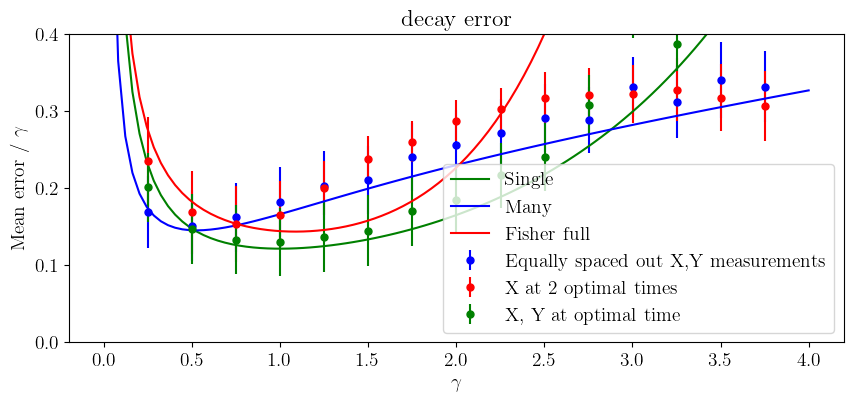

In [27]:
import numpy as np
import pandas as pd
import os
user_home = os.path.expanduser("~")
# Load the Excel file
loaded_df = pd.read_excel(user_home + r'\OneDrive - Bar-Ilan University - Students\Data\Crosstalk\graphs_for_paper\stability-Decay_a.xlsx')

# Assign the columns to variables
shots = loaded_df["shots"].values
Decay = loaded_df["Decay"].values
errors_fisher_median = loaded_df["errors_fisher_median_a"].values
errors_fisher_std = loaded_df["errors_fisher_std_a"].values
errors_local_median = loaded_df["errors_local_median_a"].values
errors_local_std = loaded_df["errors_local_std_a"].values
errors_uniform_median = loaded_df["errors_uniform_median_a"].values
errors_uniform_std = loaded_df["errors_uniform_std_a"].values

#############

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # Adjust the figure size to make the plot longer
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}

plt.rc('font', **font)
# plt.plot(Decay, 100 * np.array(errors_uniform_median ), linestyle='--', marker='o', color='blue', markersize=5,
#          label='X at 20 fixed times')
# plt.plot(Decay, 100 * np.array(errors_fisher_median ), linestyle='--', marker='o', color='red', markersize=5,
#          label='X at 2 non-optimal times')
# plt.plot(Decay, 100 * np.array(errors_local_median ), linestyle='--', marker='o', color='green', markersize=5,
#          label='X, Y at non-optimal time')

plt.errorbar(Decay, np.array(errors_uniform_median), yerr= np.array(errors_uniform_std),
             fmt='o', color='blue', label='Equally spaced out X,Y measurements', markersize=5)
plt.errorbar(Decay, np.array(errors_fisher_median), yerr= np.array(errors_fisher_std ),
             fmt='o', color='red', label='X at 2 optimal times', markersize=5)
plt.errorbar(Decay,  np.array(errors_local_median), yerr= np.array(errors_local_std ), fmt='o',
             color='green', label='X, Y at optimal time', markersize=5)

# Scatter points for 75th percentiles

###

N = 1000
t_max = np.pi
samples = 20
t = 1
t_fisher = [0.4439410861020235, 1.784695781691183]
T_many = np.linspace(0, t_max, samples)

sigma_single = 1 / np.sqrt(N/2)
sigma_many = 1 / np.sqrt(N / (2*samples))
sigma_fisher = 1 / np.sqrt(N/2)
Gamma = np.linspace(0, 4, 100)

error_single = []
error_many = []
error_fisher = []
error_fisher_full = []
for g in Gamma:
    g =g
    error_single.append(rao_bound_complex([t], g, sigma_single/g))
    error_many.append(rao_bound_complex(T_many, g, sigma_many)/g)
    error_fisher.append(rao_bound_gausian(t_fisher, 1, g, sigma_fisher)[0]/g)
    error_fisher_full.append(rao_bound(t_fisher, 1, g, [N/2, N/2])[0]/g)

plt.plot(Gamma, error_single, label='Single', color='green')
plt.plot(Gamma, error_many, label='Many', color='blue')
# plt.plot(Gamma, error_fisher, label='Fisher', color = 'orange')
plt.plot(Gamma, error_fisher_full, label='Fisher full', color = 'red')
# plt.plot(T, ratio, label='Ratio single/many')
# plt.plot(T, np.ones(samples), label='1')
# plt.ylim([0,0.2])


###

# plt.title(f'Shots={Decay} ')
plt.title('decay error')

plt.xlabel('$\gamma$')
plt.ylabel('Mean error / $\gamma$')
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
# plt.xlim([0, 2.52])
plt.ylim([0,0.4])
plt.grid()

plt.legend()

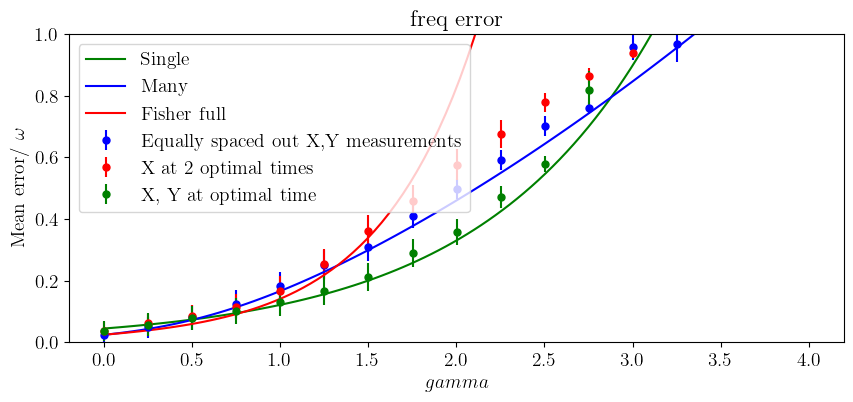

In [30]:
import numpy as np
import pandas as pd

# Load the Excel file
loaded_df = pd.read_excel(user_home + r'\OneDrive - Bar-Ilan University - Students\Data\Crosstalk\graphs_for_paper\stability-Decay_w.xlsx')

# Assign the columns to variables
shots = loaded_df["shots"].values
Decay = loaded_df["Decay"].values
errors_fisher_median = loaded_df["errors_fisher_median_w"].values
errors_fisher_std = loaded_df["errors_fisher_std_w"].values
errors_local_median = loaded_df["errors_local_median_w"].values
errors_local_std = loaded_df["errors_local_std_w"].values
errors_uniform_median = loaded_df["errors_uniform_median_w"].values
errors_uniform_std = loaded_df["errors_uniform_std_w"].values

#############

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # Adjust the figure size to make the plot longer
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}

plt.rc('font', **font)
# plt.plot(Decay, 100 * np.array(errors_uniform_median ), linestyle='--', marker='o', color='blue', markersize=5,
#          label='X at 20 fixed times')
# plt.plot(Decay, 100 * np.array(errors_fisher_median ), linestyle='--', marker='o', color='red', markersize=5,
#          label='X at 2 non-optimal times')
# plt.plot(Decay, 100 * np.array(errors_local_median ), linestyle='--', marker='o', color='green', markersize=5,
#          label='X, Y at non-optimal time')

plt.errorbar(Decay, np.array(errors_uniform_median), yerr= np.array(errors_uniform_std),
             fmt='o', color='blue', label='Equally spaced out X,Y measurements', markersize=5)
plt.errorbar(Decay, np.array(errors_fisher_median), yerr= np.array(errors_fisher_std ),
             fmt='o', color='red', label='X at 2 optimal times', markersize=5)
plt.errorbar(Decay,  np.array(errors_local_median), yerr= np.array(errors_local_std ), fmt='o',
             color='green', label='X, Y at optimal time', markersize=5)

# Scatter points for 75th percentiles

###

N = 1000/2
t_max = np.pi
samples = 20
t = 1
t_fisher = [0.4439410861020235, 1.784695781691183]
T_many = np.linspace(0, t_max, samples)

sigma_single = 1 / np.sqrt(N)
sigma_many = 1 / np.sqrt(N / (samples))
sigma_fisher = 1 / np.sqrt(N)
Gamma = np.linspace(0, 4, 100)

error_single = []
error_many = []
error_fisher = []
error_fisher_full = []
for g in Gamma:
    error_single.append(rao_bound_complex([t], g, sigma_single))
    error_many.append(rao_bound_complex(T_many, g, sigma_many))
    error_fisher.append(rao_bound_gausian(t_fisher, 1, g, sigma_fisher)[1])
    error_fisher_full.append(rao_bound(t_fisher, 1, g, [N, N])[1])

plt.plot(Gamma, error_single, label='Single', color='green')
plt.plot(Gamma, error_many, label='Many', color='blue')
plt.plot(Gamma, error_fisher_full, label='Fisher full', color = 'red')
# plt.plot(T, ratio, label='Ratio single/many')
# plt.plot(T, np.ones(samples), label='1')
# plt.ylim([0,0.2])


###

plt.title('freq error')
plt.xlabel('$gamma$')
plt.ylabel('Mean error/ $\omega$')
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
# plt.xlim([0, 2.52])
plt.ylim([0,1])
plt.grid()

plt.legend()

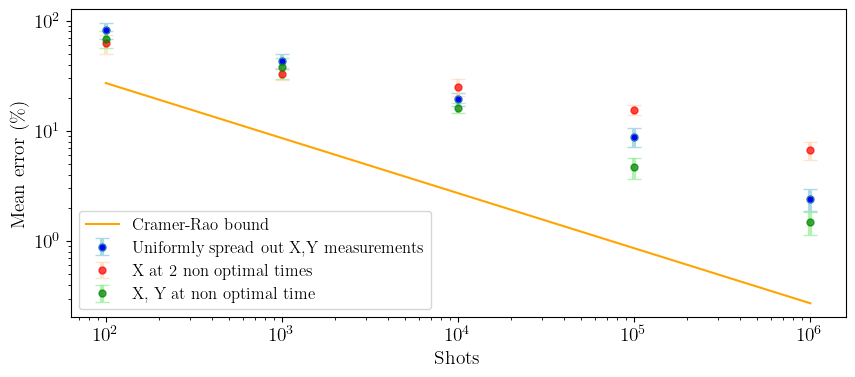

In [62]:
import numpy as np
import pandas as pd

###W = 1, decay = 3 non-opt
###W = 1, decay = 1 opt

# Load the Excel file
loaded_df = pd.read_excel('C:\\Projects\\Crosstalk\\data_for_paper/errors_non_optimal.xlsx')

# Assign the columns to variables
shots = loaded_df["shots"].values
errors_fisher_median = loaded_df["errors_fisher_median"].values
errors_fisher_std = loaded_df["errors_fisher_std"].values
errors_local_median = loaded_df["errors_local_median"].values
errors_local_std = loaded_df["errors_local_std"].values
errors_uniform_median = loaded_df["errors_uniform_median"].values
errors_uniform_std = loaded_df["errors_uniform_std"].values

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}  # Adjust the figure size to make the plot longer

# plt.rc('font', **font)


plt.errorbar(shots, 100 * np.array(errors_uniform_median), yerr=100 * np.array(errors_uniform_std), fmt='o', capsize=5,
             ecolor='lightblue', elinewidth=3, markerfacecolor='blue', markersize=5,
             label='Uniformly spread out X,Y measurements')

plt.errorbar(shots, 100 * np.array(errors_fisher_median), yerr=100 * np.array(errors_fisher_std), fmt='o', capsize=5,
             ecolor='peachpuff', elinewidth=3, color='red', markersize=5, label='X at 2 non optimal times', alpha=0.7)

plt.errorbar(shots, 100 * np.array(errors_local_median), yerr=100 * np.array(errors_local_std), fmt='o', capsize=5,
             ecolor='lightgreen', elinewidth=3, color='green', markersize=5, label='X, Y at non optimal time',
             alpha=0.7)

# Shots_2q = [100, 1000, 10000, 100000, 1000000]
# Errors_2q = [50.530481, 18.415648, 7.961954, 6.401243, 6.696693]
# plt.plot(Shots_2q, Errors_2q, linestyle='', marker='o', color='blue', markersize=5, label='2 qubits')
# shots3q=[10000]
# errors3q=[5.809173305]
# plt.plot(shots3q, errors3q, linestyle='', marker='o', color='red', markersize=5, label='More data')
# plt.title(f'Error vs shots W={W} Decay={Decay} ')
# plt.title(f'{n} qubits')
plt.plot(shots, 100 * np.e / np.sqrt(shots), '-', label='Cramer-Rao bound', color='orange')
plt.xlabel('Shots')
plt.ylabel('Mean error (\%)')
plt.yscale('log')
plt.xscale('log')
# plt.grid()

plt.rcParams['lines.markersize'] = 10
# Example size for markers
plt.rcParams['font.size'] = 12  # Example size for font

plt.legend()

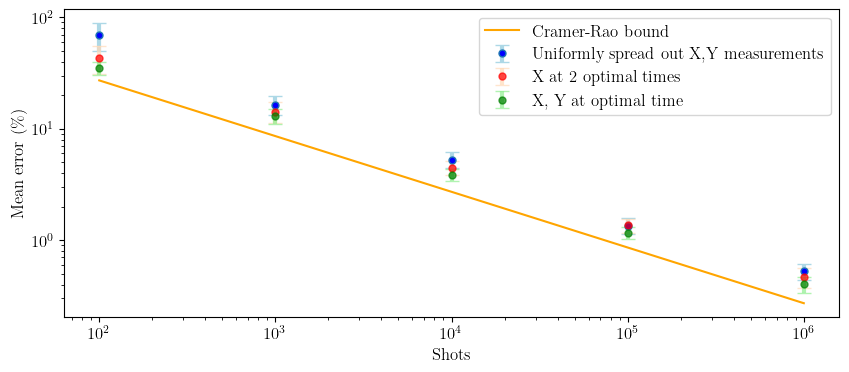

In [8]:
import numpy as np
import pandas as pd

###W = 1, decay = 3 non-opt
###W = 1, decay = 1 opt

# Load the Excel file
loaded_df = pd.read_excel('C:\\Projects\\Crosstalk\\data_for_paper/errors_optimal.xlsx')

# Assign the columns to variables
shots = loaded_df["shots"].values
errors_fisher_median = loaded_df["errors_fisher_median"].values
errors_fisher_std = loaded_df["errors_fisher_std"].values
errors_local_median = loaded_df["errors_local_median"].values
errors_local_std = loaded_df["errors_local_std"].values
errors_uniform_median = loaded_df["errors_uniform_median"].values
errors_uniform_std = loaded_df["errors_uniform_std"].values

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}  # Adjust the figure size to make the plot longer

# plt.rc('font', **font)


plt.errorbar(shots, 100 * np.array(errors_uniform_median), yerr=100 * np.array(errors_uniform_std), fmt='o', capsize=5,
             ecolor='lightblue', elinewidth=3, markerfacecolor='blue', markersize=5,
             label='Uniformly spread out X,Y measurements')

plt.errorbar(shots, 100 * np.array(errors_fisher_median), yerr=100 * np.array(errors_fisher_std), fmt='o', capsize=5,
             ecolor='peachpuff', elinewidth=3, color='red', markersize=5, label='X at 2 optimal times', alpha=0.7)

plt.errorbar(shots, 100 * np.array(errors_local_median), yerr=100 * np.array(errors_local_std), fmt='o', capsize=5,
             ecolor='lightgreen', elinewidth=3, color='green', markersize=5, label='X, Y at optimal time', alpha=0.7)

# Shots_2q = [100, 1000, 10000, 100000, 1000000]
# Errors_2q = [50.530481, 18.415648, 7.961954, 6.401243, 6.696693]
# plt.plot(Shots_2q, Errors_2q, linestyle='', marker='o', color='blue', markersize=5, label='2 qubits')
# shots3q=[10000]
# errors3q=[5.809173305]
# plt.plot(shots3q, errors3q, linestyle='', marker='o', color='red', markersize=5, label='More data')
# plt.title(f'Error vs shots W={W} Decay={Decay} ')
# plt.title(f'{n} qubits')
plt.plot(shots, 100 * np.e / np.sqrt(shots), '-', label='Cramer-Rao bound', color='orange')
plt.xlabel('Shots')
plt.ylabel('Mean error (\%)')
plt.yscale('log')
plt.xscale('log')
# plt.grid()

plt.rcParams['lines.markersize'] = 10
# Example size for markers
plt.rcParams['font.size'] = 12  # Example size for font

plt.legend()